In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

# Load datasets
contestants_url = 'https://raw.githubusercontent.com/tturocy/eco7026a/main/2022-23/contestants.csv'
votes_url = 'https://raw.githubusercontent.com/tturocy/eco7026a/main/2022-23/votes.csv'

contestants_df = pd.read_csv(contestants_url)
votes_df = pd.read_csv(votes_url)


# Cleaning Contestants Datasets

In [3]:
contestants_df.head()

,year,to_country_id,to_country,performer,song,place_contest,sf_num,running_final,running_sf,place_final,...,place_sf,points_sf,points_tele_final,points_jury_final,points_tele_sf,points_jury_sf,composers,lyricists,lyrics,youtube_url
0,1956,ch,Switzerland,Lys Assia,Refrain,2.0,NaN,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Georg Benz Stahl,NaN,"(Refrain d'amour...)\n\nRefrain, couleur du ci...",https://youtube.com/watch?v=IyqIPvOkiRk
1,1956,nl,Netherlands,Jetty Paerl,De Vogels Van Holland,2.0,NaN,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Cor Lemaire,Annie M. G. Schmidt,De vogels van Holland zijn zo muzikaal\nZe ler...,https://youtube.com/watch?v=u45UQVGRVPA
2,1956,be,Belgium,Fud Leclerc,Messieurs Les Noyés De La Seine,2.0,NaN,3.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Jacques Say;Jean Miret,Robert Montal,Messieurs les noyés de la Seine\nOuvrez-moi le...,https://youtube.com/watch?v=U9O3sqlyra0
3,1956,de,Germany,Walter Andreas Schwarz,Im Wartesaal Zum Großen Glück,2.0,NaN,4.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Walter Andreas Schwarz,NaN,"Es gibt einen Hafen, da fährt kaum ein Schiff\...",https://youtube.com/watch?v=BDNARIDnmTc
4,1956,fr,France,Mathé Altéry,Le Temps Perdu,2.0,NaN,5.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,André Lodge,Rachèle Thoreau,"Chante, carillon\nLe chant du temps perdu\nCha...",https://youtube.com/watch?v=dm1L0XyikKI


In [4]:
contestants_df.info

<bound method DataFrame.info of       year to_country_id   to_country                  performer  \
0     1956            ch  Switzerland                  Lys Assia   
1     1956            nl  Netherlands                Jetty Paerl   
2     1956            be      Belgium                Fud Leclerc   
3     1956            de      Germany     Walter Andreas Schwarz   
4     1956            fr       France               Mathé Altéry   
...    ...           ...          ...                        ...   
1729  2023            lv       Latvia              Sudden Lights   
1730  2023            ie      Ireland                 Wild Youth   
1731  2023            nl  Netherlands  Mia Nicolai & Dion Cooper   
1732  2023            az   Azerbaijan                TuralTuranX   
1733  2023            mt        Malta                 The Busker   

                                 song  place_contest  sf_num  running_final  \
0                             Refrain            2.0     NaN            

In [5]:
#Check for missing data
missing_values = contestants_df.isnull().sum()
print(missing_values)

year                    0
to_country_id           0
to_country              0
performer               0
song                    3
place_contest          56
sf_num               1094
running_final         336
running_sf           1129
place_final           337
points_final          349
place_sf             1129
points_sf            1129
points_tele_final    1553
points_jury_final    1553
points_tele_sf       1522
points_jury_sf       1522
composers              54
lyricists             749
lyrics                 12
youtube_url            12
dtype: int64


In [6]:
#Dropping columns not important to our analysis
columns_to_drop = ['sf_num', 'running_sf', 'points_tele_sf', 'points_jury_sf', 'place_sf', 'points_sf',
                   'lyricists', 'lyrics', 'youtube_url', 'composers',
                   'points_tele_final', 'points_jury_final']

contestants_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [7]:
contestants_df.head()

,year,to_country_id,to_country,performer,song,place_contest,running_final,place_final,points_final
0,1956,ch,Switzerland,Lys Assia,Refrain,2.0,2.0,2.0,NaN
1,1956,nl,Netherlands,Jetty Paerl,De Vogels Van Holland,2.0,1.0,2.0,NaN
2,1956,be,Belgium,Fud Leclerc,Messieurs Les Noyés De La Seine,2.0,3.0,2.0,NaN
3,1956,de,Germany,Walter Andreas Schwarz,Im Wartesaal Zum Großen Glück,2.0,4.0,2.0,NaN
4,1956,fr,France,Mathé Altéry,Le Temps Perdu,2.0,5.0,2.0,NaN


In [8]:
contestants_df.tail()

,year,to_country_id,to_country,performer,song,place_contest,running_final,place_final,points_final
1729,2023,lv,Latvia,Sudden Lights,Aijā,NaN,NaN,NaN,NaN
1730,2023,ie,Ireland,Wild Youth,We Are One,NaN,NaN,NaN,NaN
1731,2023,nl,Netherlands,Mia Nicolai & Dion Cooper,Burning Daylight,NaN,NaN,NaN,NaN
1732,2023,az,Azerbaijan,TuralTuranX,Tell Me More,NaN,NaN,NaN,NaN
1733,2023,mt,Malta,The Busker,Dance (Our Own Party),NaN,NaN,NaN,NaN


In [9]:
missing_values = contestants_df.isnull().sum()
print(missing_values)

year               0
to_country_id      0
to_country         0
performer          0
song               3
place_contest     56
running_final    336
place_final      337
points_final     349
dtype: int64


In [10]:
# Find rows with missing values
rows_with_missing_values = contestants_df[contestants_df.isnull().any(axis=1)]

# Display the rows with missing values
print(rows_with_missing_values)

      year to_country_id   to_country                  performer  \
0     1956            ch  Switzerland                  Lys Assia   
1     1956            nl  Netherlands                Jetty Paerl   
2     1956            be      Belgium                Fud Leclerc   
3     1956            de      Germany     Walter Andreas Schwarz   
4     1956            fr       France               Mathé Altéry   
...    ...           ...          ...                        ...   
1729  2023            lv       Latvia              Sudden Lights   
1730  2023            ie      Ireland                 Wild Youth   
1731  2023            nl  Netherlands  Mia Nicolai & Dion Cooper   
1732  2023            az   Azerbaijan                TuralTuranX   
1733  2023            mt        Malta                 The Busker   

                                 song  place_contest  running_final  \
0                             Refrain            2.0            2.0   
1               De Vogels Van Holland    

In [11]:
#missing data might be as a result of point system change that started in 1975
contestants_df = contestants_df[contestants_df['year'] >= 1975]

# Now recheck missing values after this filter
missing_values_after_filter = contestants_df.isnull().sum()
print(missing_values_after_filter)

year               0
to_country_id      0
to_country         0
performer          0
song               3
place_contest     56
running_final    336
place_final      337
points_final     337
dtype: int64


In [12]:
#Checking for duplicates
duplicates = contestants_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


# Cleaning Votes Datasets

In [13]:
votes_df.head()

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
0,1957,final,at,nl,at,nl,6,NaN,NaN
1,1957,final,at,fr,at,fr,0,NaN,NaN
2,1957,final,at,dk,at,dk,0,NaN,NaN
3,1957,final,at,lu,at,lu,3,NaN,NaN
4,1957,final,at,de,at,de,0,NaN,NaN


In [14]:
votes_df.tail()

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
51349,2023,final,wld,al,wld,al,6,6.0,NaN
51350,2023,final,wld,pt,wld,pt,0,0.0,NaN
51351,2023,final,wld,rs,wld,rs,0,0.0,NaN
51352,2023,final,wld,gb,wld,gb,0,0.0,NaN
51353,2023,final,wld,de,wld,de,0,0.0,NaN


In [15]:
# Check for missing values in each column
missing_values = votes_df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

year                   0
round                  0
from_country_id        0
to_country_id          0
from_country           0
to_country             0
total_points           0
tele_points        39613
jury_points        39639
dtype: int64


In [16]:
import pandas as pd

# Assuming your dataset is already loaded into a DataFrame named votes_df
# For example: votes_df = pd.read_csv('path_to_votes_dataset.csv')

# Filter to see rows where 'tele_points' is missing
missing_tele_points = votes_df[votes_df['tele_points'].isnull()]

# Filter to see rows where 'jury_points' is missing
missing_jury_points = votes_df[votes_df['jury_points'].isnull()]

# Display the rows with missing 'tele_points'
print("Rows with missing 'tele_points':")
print(missing_tele_points)

# Display the rows with missing 'jury_points'
print("Rows with missing 'jury_points':")
print(missing_jury_points)


Rows with missing 'tele_points':
       year         round from_country_id to_country_id from_country  \
0      1957         final              at            nl           at   
1      1957         final              at            fr           at   
2      1957         final              at            dk           at   
3      1957         final              at            lu           at   
4      1957         final              at            de           at   
...     ...           ...             ...           ...          ...   
39608  2015  semi-final-2              gb            cz           gb   
39609  2015  semi-final-2              gb            pt           gb   
39610  2015  semi-final-2              gb            is           gb   
39611  2015  semi-final-2              gb            sm           gb   
39612  2015  semi-final-2              gb            ch           gb   

      to_country  total_points  tele_points  jury_points  
0             nl             6          NaN

In [17]:
# Find duplicate rows
duplicate_rows = votes_df[votes_df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows (if any):")
print(duplicate_rows)


Duplicate Rows (if any):
Empty DataFrame
Columns: [year, round, from_country_id, to_country_id, from_country, to_country, total_points, tele_points, jury_points]
Index: []


In [18]:
# Count the number of duplicate rows
num_duplicate_rows = votes_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicate_rows}")


Number of duplicate rows: 0


In [19]:
if num_duplicate_rows > 0:
    votes_df = votes_df.drop_duplicates()
    print("Duplicates have been removed.")
else:
    print("No duplicates found.")


No duplicates found.


# 1. Verify the internal consistency of the data. The contestants dataset reports the points scored by the contestant in the final. Confirm whether these are equal to the sum of points reported as awarded in the votes dataset. Also confirm that the contestant’s reported ranking (place_final) is the

In [20]:
agg_votes = votes_df.groupby(['year', 'to_country_id']).total_points.sum().reset_index()
print(agg_votes)

      year to_country_id  total_points
0     1957            at             3
1     1957            be             5
2     1957            ch             5
3     1957            de             8
4     1957            dk            10
...    ...           ...           ...
1650  2023            pt            59
1651  2023            rs            30
1652  2023            se           583
1653  2023            si            78
1654  2023            ua           243

[1655 rows x 3 columns]


In [21]:
merged_df = pd.merge(contestants_df, agg_votes, on=['year', 'to_country_id'], how='inner')
print(merged_df)

      year to_country_id      to_country           performer  \
0     1975            nl     Netherlands            Teach-In   
1     1975            gb  United Kingdom         The Shadows   
2     1975            it           Italy  Wess & Dori Ghezzi   
3     1975            fr          France         Nicole Rieu   
4     1975            lu      Luxembourg           Géraldine   
...    ...           ...             ...                 ...   
1142  2023            pt        Portugal             Mimicat   
1143  2023            rs          Serbia          Luke Black   
1144  2023            rs          Serbia          Luke Black   
1145  2023            gb  United Kingdom          Mae Muller   
1146  2023            de         Germany    Lord Of The Lost   

                            song  place_contest  running_final  place_final  \
0                    Ding-A-Dong            1.0            1.0          1.0   
1              Let Me Be The One            2.0            9.0          2

In [22]:
merged_df['points_match'] = merged_df['points_final'] == merged_df['total_points']

In [23]:
print(merged_df)

      year to_country_id      to_country           performer  \
0     1975            nl     Netherlands            Teach-In   
1     1975            gb  United Kingdom         The Shadows   
2     1975            it           Italy  Wess & Dori Ghezzi   
3     1975            fr          France         Nicole Rieu   
4     1975            lu      Luxembourg           Géraldine   
...    ...           ...             ...                 ...   
1142  2023            pt        Portugal             Mimicat   
1143  2023            rs          Serbia          Luke Black   
1144  2023            rs          Serbia          Luke Black   
1145  2023            gb  United Kingdom          Mae Muller   
1146  2023            de         Germany    Lord Of The Lost   

                            song  place_contest  running_final  place_final  \
0                    Ding-A-Dong            1.0            1.0          1.0   
1              Let Me Be The One            2.0            9.0          2

In [24]:
all_points_match = merged_df['points_match'].all()

In [25]:
print(f"Do all points match? {all_points_match}")

Do all points match? False


In [26]:
# If not all points match, we can inspect the cases where they don't
if not all_points_match:
    discrepancies = merged_df[~merged_df['points_match']]
    print("Discrepancies found in the following rows:")
    print(discrepancies)

Discrepancies found in the following rows:
      year to_country_id           to_country           performer  \
627   2004            ua              Ukraine             Ruslana   
628   2004            cs  Serbia & Montenegro  Željko Joksimović   
629   2004            gr               Greece        Sakis Rouvas   
631   2004            cy               Cyprus        Lisa Andreas   
633   2004            al              Albania      Anjeza Shahini   
...    ...           ...                  ...                 ...   
1129  2023            hr              Croatia               Let 3   
1135  2023            md              Moldova       Pasha Parfeni   
1138  2023            ch          Switzerland         Remo Forrer   
1142  2023            pt             Portugal             Mimicat   
1144  2023            rs               Serbia          Luke Black   

                       song  place_contest  running_final  place_final  \
627             Wild Dances            1.0           1

# Also confirm that the contestant’s reported ranking (place_final) is the one implied by their points total. Report on any discrepancies you may find.


In [27]:
# Sort by year and points in descending order
contestants_df_sorted = contestants_df.sort_values(by=['year', 'points_final'], ascending=[True, False])

In [28]:
# Generate an implied ranking based on sorted points
contestants_df_sorted['implied_rank'] = contestants_df_sorted.groupby('year').cumcount() + 1

In [29]:
# Compare with reported ranking
contestants_df_sorted['ranking_match'] = contestants_df_sorted['implied_rank'] == contestants_df_sorted['place_final']

In [30]:
# Identify discrepancies
discrepancies = contestants_df_sorted[~contestants_df_sorted['ranking_match']]

In [31]:
# Output discrepancies
print("Discrepancies found in the following rows:")
print(discrepancies[['year', 'to_country_id', 'performer', 'place_final', 'points_final', 'implied_rank']])

Discrepancies found in the following rows:
      year to_country_id                  performer  place_final  \
301   1975            mc                     Sophie         13.0   
339   1977            pt                  Os Amigos         14.0   
352   1978            ch               Carole Vinci          9.0   
361   1978            tr                      Nazar         18.0   
381   1979            at            Christina Simon         18.0   
...    ...           ...                        ...          ...   
1729  2023            lv              Sudden Lights          NaN   
1730  2023            ie                 Wild Youth          NaN   
1731  2023            nl  Mia Nicolai & Dion Cooper          NaN   
1732  2023            az                TuralTuranX          NaN   
1733  2023            mt                 The Busker          NaN   

      points_final  implied_rank  
301           22.0            14  
339           18.0            15  
352           65.0            10  


In [32]:
total_rows = len(merged_df)
total_discrepancies = len(discrepancies)
print(f"Total rows analyzed: {total_rows}")
print(f"Total discrepancies found: {total_discrepancies}")

Total rows analyzed: 1147
Total discrepancies found: 387


In [33]:
example_discrepancies = discrepancies[['year', 'to_country_id', 'performer', 'place_final', 'points_final', 'implied_rank']].head()
print("Examples of discrepancies:")
print(example_discrepancies)

Examples of discrepancies:
     year to_country_id        performer  place_final  points_final  \
301  1975            mc           Sophie         13.0          22.0   
339  1977            pt        Os Amigos         14.0          18.0   
352  1978            ch     Carole Vinci          9.0          65.0   
361  1978            tr            Nazar         18.0           2.0   
381  1979            at  Christina Simon         18.0           5.0   

     implied_rank  
301            14  
339            15  
352            10  
361            19  
381            19  


In [34]:
discrepancies_by_year = discrepancies['year'].value_counts()
discrepancies_by_country = discrepancies['to_country_id'].value_counts()
print("Discrepancies by Year:")
print(discrepancies_by_year)
print("Discrepancies by Country:")
print(discrepancies_by_country)

Discrepancies by Year:
2020    41
2023    26
2007    19
2011    18
2008    18
2009    17
2005    17
2018    17
2017    16
2016    16
2012    16
2006    16
2004    15
2019    15
2022    15
2010    14
2015    13
2013    13
2021    13
2014    11
1997     4
2002     3
1983     3
1990     2
1988     2
2001     2
1978     2
1999     2
1996     2
1981     2
1984     2
1985     2
2003     2
1979     1
1987     1
1977     1
1989     1
1991     1
1993     1
1994     1
1995     1
1998     1
2000     1
1975     1
Name: year, dtype: int64
Discrepancies by Country:
Belgium            11
Belarus            11
Slovenia           11
North Macedonia    11
Switzerland        11
                   ..
sk                  1
cy                  1
Australia           1
me                  1
mc                  1
Name: to_country_id, Length: 87, dtype: int64


In [35]:
discrepancies['ranking_difference'] = discrepancies['implied_rank'] - discrepancies['place_final']
print("Range of Discrepancies in Ranking:")
print(discrepancies['ranking_difference'].describe())

Range of Discrepancies in Ranking:
count    50.000000
mean      1.020000
std       0.141421
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: ranking_difference, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_7676\2319112498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrepancies['ranking_difference'] = discrepancies['implied_rank'] - discrepancies['place_final']


In [36]:
missing_data = merged_df.isnull().sum()
print("Missing Data in Each Column:")
print(missing_data)

Missing Data in Each Column:
year              0
to_country_id     0
to_country        0
performer         0
song              2
place_contest    10
running_final    38
place_final      38
points_final     38
total_points      0
points_match      0
dtype: int64


# 2. What countries have been the most and least successful?

In [37]:
avg_points_per_participation = merged_df.groupby('to_country_id')['points_final'].mean().sort_values(ascending=False)
avg_points_per_participation

to_country_id
bg    283.000000
au    219.857143
ua    201.277778
cs    200.000000
ru    160.454545
it    152.172414
az    144.692308
rs    134.416667
se    132.978261
cz    129.200000
md    128.538462
am    121.583333
ee     98.500000
lv     97.100000
il     95.000000
ge     90.142857
ie     87.971429
mt     87.708333
nl     84.735294
no     83.954545
gr     83.820513
ch     83.636364
al     82.818182
fr     82.702128
gb     82.145833
lt     81.812500
ro     80.789474
dk     80.676471
hu     79.428571
mk     74.888889
be     72.828571
is     72.000000
hr     70.473684
cy     69.562500
ba     69.000000
mc     66.000000
pl     65.812500
de     65.659574
pt     62.771429
at     61.764706
by     61.333333
es     61.229167
tr     60.484848
fi     59.885714
yu     56.153846
si     50.187500
lu     49.210526
sm     47.000000
me     40.500000
sk     14.000000
ma      7.000000
Name: points_final, dtype: float64

In [38]:
median_points = merged_df.groupby('to_country_id')['points_final'].median().sort_values(ascending=False)
median_points

to_country_id
cs    200.0
au    173.0
bg    170.0
ua    152.0
az    132.0
cz    129.0
am    125.5
ru    123.0
rs    107.5
lv    107.5
it    103.0
ge     97.0
md     97.0
ee     96.0
se     94.5
mc     93.0
hu     88.5
ie     86.0
il     79.0
dk     74.0
fr     73.0
ro     71.0
mt     71.0
gb     67.5
gr     64.0
ch     64.0
al     62.0
nl     61.0
cy     58.5
no     57.0
hr     56.0
at     55.0
si     55.0
ba     53.0
es     52.5
mk     52.0
sm     50.0
lt     49.0
de     48.0
is     46.0
be     46.0
by     45.5
yu     44.0
pl     42.5
me     40.5
lu     39.0
tr     37.0
pt     33.0
fi     32.0
sk     15.0
ma      7.0
Name: points_final, dtype: float64

In [39]:
consistency = merged_df.groupby('to_country_id')['points_final'].std().sort_values()
consistency

to_country_id
me      4.949747
sk      5.567764
ge     31.440041
sm     31.606961
si     32.556041
hr     37.988841
lu     38.885271
yu     44.026216
mc     45.171894
al     46.069118
by     46.435619
ba     54.363699
ie     57.763965
hu     58.996368
tr     60.305017
mt     63.175724
ee     64.225934
am     64.808050
pl     65.362802
dk     66.177319
gr     66.258613
de     66.886431
es     67.903323
lv     67.989297
ro     68.461326
at     75.107220
lt     75.601780
cy     77.374222
az     78.247880
gb     78.729267
be     80.063021
fr     83.263572
is     84.139536
rs     87.483462
no     87.908767
mk     88.523224
cs     89.095454
nl     91.842193
ch     92.124514
md     98.314644
cz     99.890941
il    100.214627
fi    104.653707
ru    123.492328
se    127.222376
pt    128.144928
it    134.543426
au    141.414790
ua    167.804089
bg    195.661698
ma           NaN
Name: points_final, dtype: float64

In [40]:
top_positions = merged_df[merged_df['place_final'] <= 5].groupby('to_country_id').size().sort_values(ascending=False)
top_positions

to_country_id
se    22
gb    15
ie    14
fr    13
it    12
de    12
il    11
ru    10
no    10
ch    10
dk    10
ua     8
be     7
gr     6
nl     6
es     6
tr     6
az     5
mt     5
ee     4
cy     4
is     4
at     4
lu     4
bg     3
hr     3
rs     3
lv     3
mc     3
ro     3
yu     3
hu     2
am     2
fi     2
au     2
pl     1
pt     1
md     1
cs     1
ba     1
al     1
dtype: int64

In [41]:
participation_years = merged_df.groupby('to_country_id').size()
weighted_score = avg_points_per_participation * participation_years
weighted_score.sort_values(ascending=False)


to_country_id
se    6249.978261
it    4413.000000
gb    3943.000000
fr    3887.000000
no    3777.954545
ua    3623.000000
il    3610.000000
ru    3530.000000
gr    3269.000000
ie    3254.942857
de    3086.000000
es    2939.000000
dk    2904.352941
nl    2881.000000
ch    2843.636364
be    2549.000000
cy    2295.562500
pt    2259.771429
at    2223.529412
mt    2192.708333
fi    2155.885714
tr    1996.000000
is    1944.000000
az    1881.000000
ee    1871.500000
md    1799.538462
au    1758.857143
rs    1747.416667
bg    1698.000000
ro    1615.789474
hr    1550.421053
am    1459.000000
lt    1309.000000
ba    1242.000000
lv    1165.200000
pl    1118.812500
hu    1112.000000
al     993.818182
lu     935.000000
cz     904.400000
si     903.375000
mk     823.777778
ge     811.285714
yu     730.000000
cs     400.000000
by     368.000000
mc     330.000000
sm     188.000000
me     121.500000
sk      42.000000
ma       7.000000
dtype: float64

In [42]:
# Filter the DataFrame for the United Kingdom (gb)
country = merged_df[merged_df['to_country_id'] == 'ua']

# Display the data for the United Kingdom
#print(country)


# 3. Because the songs are presented sequentially, as behavioural economists we would be interesting in the potential for ordering effects. For example, voters may anchor on early songs, or perhaps they may remember later ones better (it is a quite long programme!) The order in which songs were presented is given by running_order. Investigate whether there is any evidence that the running order affects the final ranking. Important hint: Do not assume that there is necessarily a linear or monotonic relationship!

In [44]:
merged_df['running_final'] = pd.to_numeric(merged_df['running_final'], errors='coerce')
merged_df['place_final'] = pd.to_numeric(merged_df['place_final'], errors='coerce')

In [45]:
# Drop rows with NaN in either of these columns
merged_df.dropna(subset=['running_final', 'place_final'], inplace=True)

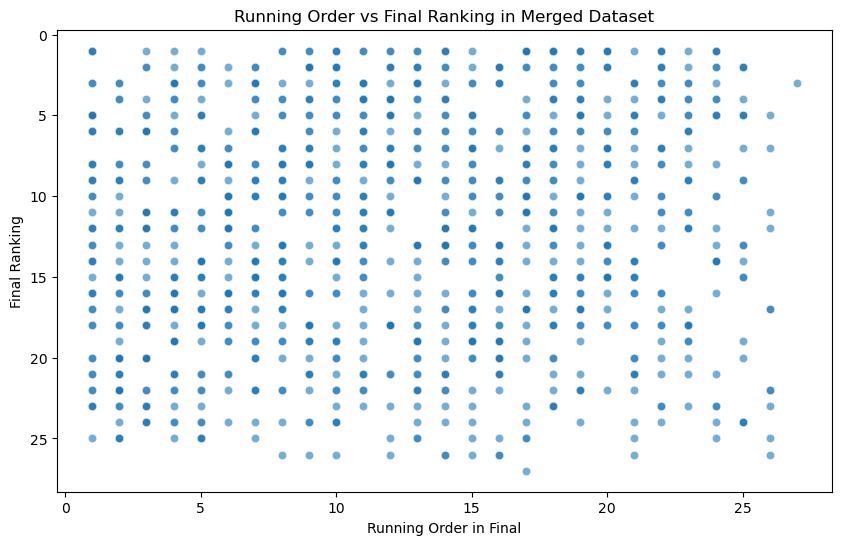

In [46]:
# Create a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='running_final', y='place_final', alpha=0.6)
plt.gca().invert_yaxis()
plt.title('Running Order vs Final Ranking in Merged Dataset')
plt.xlabel('Running Order in Final')
plt.ylabel('Final Ranking')
plt.show()

In [48]:
# Calculate and print Spearman correlation
correlation, p_value = scipy.stats.spearmanr(merged_df['running_final'], merged_df['place_final'])
print(f"Spearman correlation: {correlation}, P-value: {p_value}")

Spearman correlation: -0.1117435668017285, P-value: 0.00019244556244398325


# 4. A sometimes-controversial aspect of the competition is that some countries appear to coordinate to form “blocs” and vote for each other. One of the reasons this might occur is because of reciprocity. Using the data from up to and including 2015 but not after, provide evidence supporting the hypothesis that there is indeed reciprocity between country pairs.

In [49]:
votes_df_filtered = votes_df[votes_df['year'] <= 2015]

In [50]:
# Create a pivot table of the votes with countries that awarded points as rows and countries that received points as columns
pivot_votes = votes_df_filtered.pivot_table(index='from_country_id', columns='to_country_id', values='total_points', aggfunc='sum', fill_value=0)

# Normalize the points by the number of times each country pair had the opportunity to vote for each other
# This accounts for the fact that countries may not have been in the same semi-final or final every year
opportunities = votes_df_filtered.groupby(['from_country_id', 'to_country_id']).size().reset_index(name='opportunities')
pivot_opportunities = opportunities.pivot(index='from_country_id', columns='to_country_id', values='opportunities').fillna(0)

normalized_votes = pivot_votes.div(pivot_opportunities)
pivot_opportunities

to_country_id,ad,al,am,at,au,az,ba,be,bg,by,...,ro,rs,ru,se,si,sk,sm,tr,ua,yu
from_country_id,,,,,,,,,,,,,,,,,,,,,
ad,6.0,7.0,7.0,3.0,0.0,3.0,10.0,6.0,5.0,6.0,...,9.0,3.0,8.0,8.0,6.0,0.0,1.0,9.0,8.0,0.0
al,4.0,18.0,13.0,7.0,1.0,12.0,12.0,11.0,6.0,11.0,...,16.0,11.0,18.0,14.0,9.0,2.0,5.0,12.0,16.0,0.0
am,4.0,10.0,16.0,4.0,1.0,12.0,9.0,9.0,6.0,8.0,...,14.0,8.0,14.0,12.0,8.0,0.0,5.0,10.0,11.0,0.0
at,3.0,8.0,5.0,50.0,1.0,5.0,15.0,47.0,4.0,10.0,...,17.0,7.0,17.0,46.0,17.0,3.0,2.0,27.0,11.0,22.0
au,0.0,2.0,2.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,...,2.0,2.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0
az,1.0,10.0,11.0,4.0,1.0,15.0,6.0,6.0,2.0,3.0,...,12.0,7.0,12.0,10.0,7.0,1.0,7.0,6.0,10.0,0.0
ba,6.0,10.0,8.0,13.0,0.0,6.0,25.0,15.0,7.0,10.0,...,16.0,8.0,18.0,21.0,17.0,5.0,1.0,20.0,14.0,0.0
be,6.0,14.0,13.0,47.0,1.0,10.0,21.0,59.0,6.0,13.0,...,22.0,10.0,23.0,55.0,18.0,4.0,4.0,34.0,17.0,27.0
bg,4.0,9.0,10.0,4.0,0.0,8.0,12.0,7.0,10.0,10.0,...,14.0,7.0,10.0,14.0,8.0,2.0,1.0,13.0,14.0,0.0


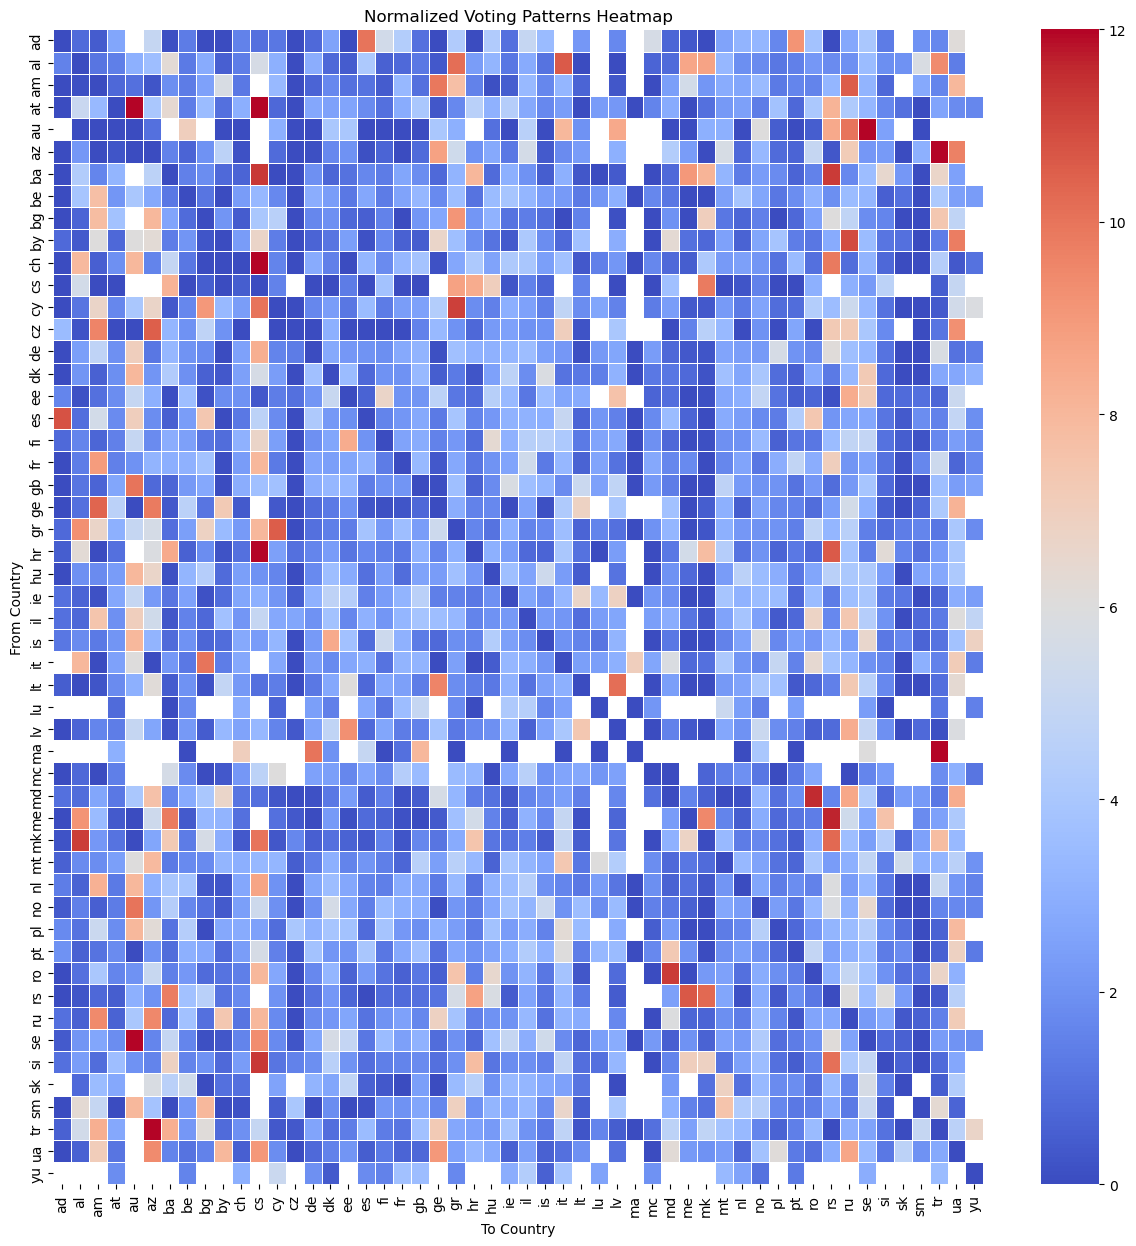

In [51]:
# Plotting the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(normalized_votes, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Normalized Voting Patterns Heatmap')
plt.xlabel('To Country')
plt.ylabel('From Country')
plt.show()

In [52]:
# To find reciprocity, we can take the minimum of the normalized points in each direction
reciprocity = normalized_votes.where(normalized_votes <= normalized_votes.transpose()).fillna(0)

# Let's sum the reciprocity scores for each country pair to find the strongest cases of potential voting alliances
reciprocity['reciprocity_score'] = reciprocity.sum(axis=1)
reciprocity_scores = reciprocity['reciprocity_score'].sort_values(ascending=False)

In [53]:
print(reciprocity_scores.head())

from_country_id
gr    95.227823
se    93.156461
ru    92.036290
ua    84.893059
rs    82.043110
Name: reciprocity_score, dtype: float64


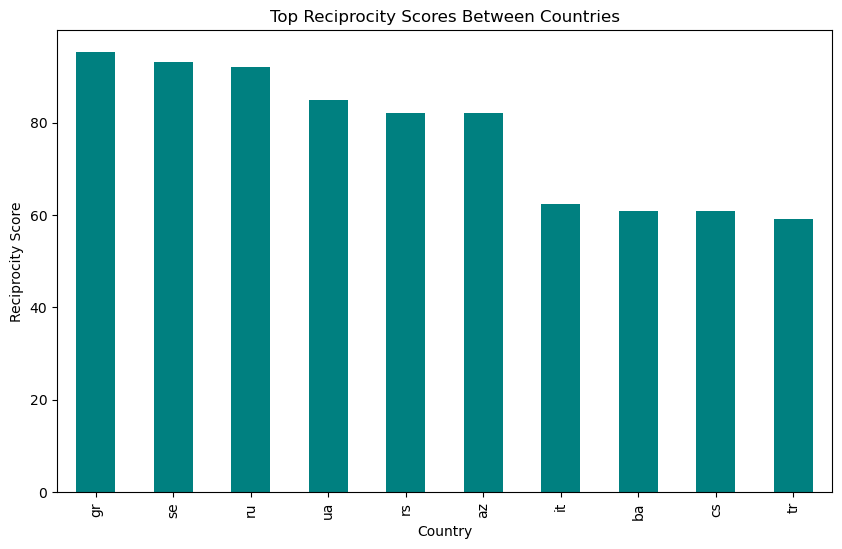

In [54]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
reciprocity_scores.head(10).plot(kind='bar', color='teal')  # Adjust to display the number of countries you prefer
plt.title('Top Reciprocity Scores Between Countries')
plt.xlabel('Country')
plt.ylabel('Reciprocity Score')
plt.show()

In [55]:
# This is a simplified example and may need to be adjusted based on your dataset's structure
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(pivot_votes)
print(f"Chi-squared test p-value: {p}")


Chi-squared test p-value: 0.0


# 5. In part in response to (real or perceived) reciprocity, from 2016 the voting structure was changed. Each country now provides two sets of votes. One set of votes comes from the “general population” of viewers of the programme via “televoting” (telephone or text-message); the other set of votes comes from a “jury” of professionals from the music industry in the country. A hypothesis is that the jury of professionals would be less likely to be biased towards entrants from other countries, and instead vote according to the “quality” of the entries. Using the data from 2016 onwards, provide evidence testing the hypothesis that jury voting is less prone to reciprocity by relating a country’s jury voting to their public voting.

In [56]:
votes_df_post_2016 = votes_df[votes_df['year'] >= 2016]

In [57]:
# Split the dataset into televoting and jury voting
televoting_df = votes_df_post_2016[['year', 'from_country_id', 'to_country_id', 'tele_points']]
jury_voting_df = votes_df_post_2016[['year', 'from_country_id', 'to_country_id', 'jury_points']]

In [58]:
# Aggregate points by country pair for televoting and jury voting
tele_points_by_country_pair = televoting_df.groupby(['from_country_id', 'to_country_id'])['tele_points'].sum().reset_index()
jury_points_by_country_pair = jury_voting_df.groupby(['from_country_id', 'to_country_id'])['jury_points'].sum().reset_index()


In [59]:
# Merge the televoting and jury voting dataframes
voting_comparison_df = pd.merge(tele_points_by_country_pair, jury_points_by_country_pair, 
                                on=['from_country_id', 'to_country_id'], how='outer')

In [60]:
# Calculate the difference in points between televoting and jury voting
voting_comparison_df['points_difference'] = voting_comparison_df['tele_points'] - voting_comparison_df['jury_points']

# Calculate the correlation between televoting and jury voting
correlation_analysis = voting_comparison_df.corr(method='spearman')
print(correlation_analysis)

                   tele_points  jury_points  points_difference
tele_points           1.000000     0.555486           0.417468
jury_points           0.555486     1.000000          -0.437483
points_difference     0.417468    -0.437483           1.000000


C:\Users\PC\AppData\Local\Temp\ipykernel_7676\1671233233.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_analysis = voting_comparison_df.corr(method='spearman')


In [61]:
from scipy.stats import wilcoxon

# Perform a Wilcoxon signed-rank test to compare the distributions of televoting and jury voting
stat, p_value = wilcoxon(voting_comparison_df['tele_points'], voting_comparison_df['jury_points'])
print(f'Wilcoxon test p-value: {p_value}')


Wilcoxon test p-value: 0.11992443286559984


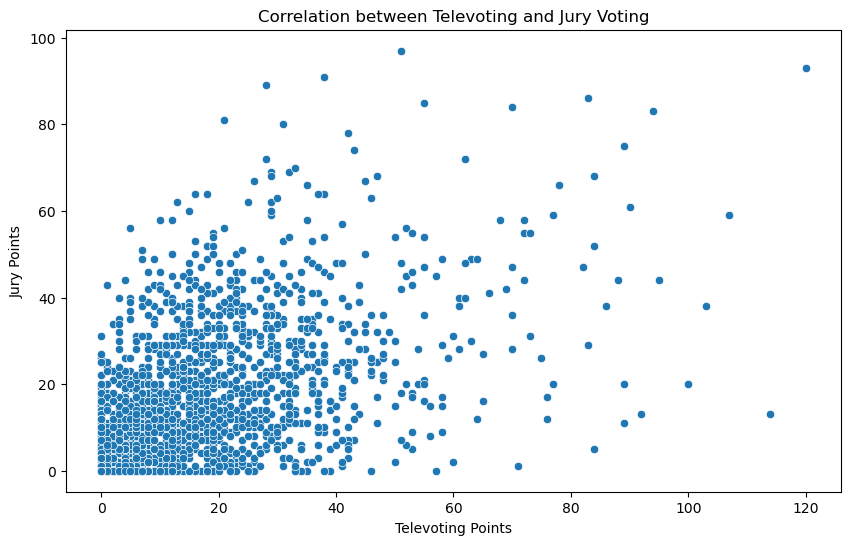

In [62]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=voting_comparison_df, x='tele_points', y='jury_points')
plt.title('Correlation between Televoting and Jury Voting')
plt.xlabel('Televoting Points')
plt.ylabel('Jury Points')
plt.show()

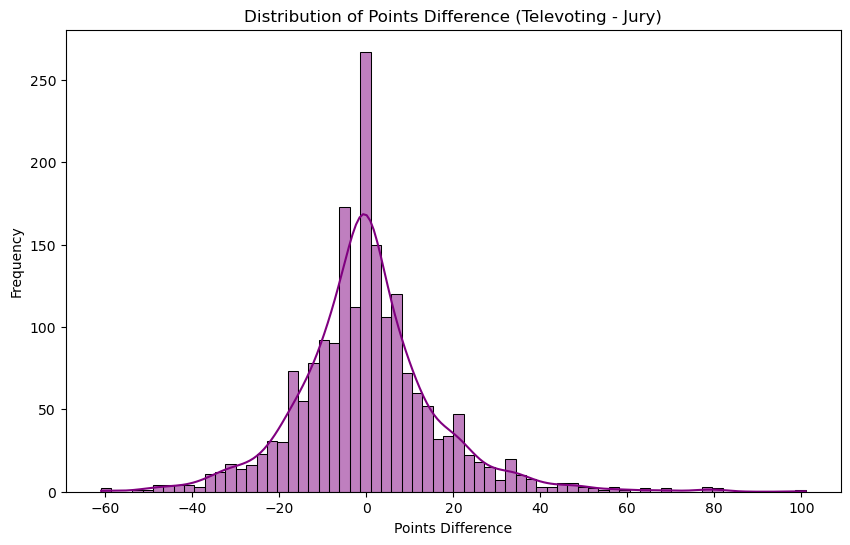

In [63]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(voting_comparison_df['points_difference'], kde=True, color='purple')
plt.title('Distribution of Points Difference (Televoting - Jury)')
plt.xlabel('Points Difference')
plt.ylabel('Frequency')
plt.show()